## Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.axes as ax

## Loading data

In [4]:
data = pd.read_csv("data_for_lr.csv")

In [5]:
data.head(10)

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
5,36.0,32.463875
6,12.0,10.780897
7,81.0,80.763399
8,25.0,24.612151
9,5.0,6.963319


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


## Data Preprocessing

Handling Null Values

In [9]:
data = data.dropna()
print("Shape of the dataset = {}".format(data.shape))

Shape of the dataset = (699, 2)


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 699 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       699 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 16.4 KB


Splitting the data

In [12]:
#training dataset and labels
train_input = np.array(data.x[0:500]).reshape(500,1)
train_output = np.array(data.x[0:500]).reshape(500,1)

#valid dataset and labels
test_input = np.array(data.x[500:700]).reshape(199,1)
test_output = np.array(data.x[500:700]).reshape(199,1)

#Print the shapes
print("Train Input Shape = {}".format(train_input.shape))
print("Train Output Shape = {}".format(train_output.shape))
print("Test Input Shape = {}".format(test_input.shape))
print("Test Output Shape = {}".format(test_output.shape))

Train Input Shape = (500, 1)
Train Output Shape = (500, 1)
Test Input Shape = (199, 1)
Test Output Shape = (199, 1)


# <font color = "red">Linear Regression</font>

## Forward Propogation

# f(x) = m*x + c

In [16]:
def forward_propagation(train_input, parameters):
    m = parameters['m']
    c = parameters['c']
    predictions = np.multiply(m, train_input) + c
    return predictions

## Defining Cost Function

### Mean Squared Error , Cost = [(y - f(x))^2]*0.5

In [19]:
def cost_function(predictions, train_output):
    cost = np.mean((train_output - predictions) ** 2) * 0.5
    return cost

## Gradient Descent For Backpropogation

Using Chain Rule:

cost

f = f(x) 

Partial Derivative of cost function w.r.t m **dcost/dm = dcost/df * df/dm **

Partial Derivative of cost function w.r.t c **dcost/dc = dcost/df * df/dc **

Partial Derivatives:

1.dc/df = (y - f) * -1 

2.df/dw = x 

3.df/db = 1 

In [22]:
def backward_propagation(train_input, train_output, predictions):
    derivatives = dict()
    df = (train_output - predictions) * -1
    dm = np.mean(np.multiply(train_input, df))
    dc = np.mean(df)
    derivatives['dm'] = dm
    derivatives['dc'] = dc
    return derivatives

## Update the Parameters

m = m - (learning_rate*dm)

c = c - (learning_rate*dc) 

In [25]:
def update_parameters(parameters, derivatives, learning_rate):
    parameters['m'] = parameters['m'] - learning_rate * derivatives['dm']
    parameters['c'] = parameters['c'] - learning_rate * derivatives['dc']
    return parameters

## Train the Data

Sequence of Steps:

Forward Propagtaion, 
Cost Function, 
Backward Propagation,
Update Parameters.

In [28]:
def train(train_input, train_output, learning_rate, iters):
    
    #random parameters
    parameters = dict()
    parameters["m"] = np.random.uniform(0,1) * -1
    parameters["c"] = np.random.uniform(0,1) * -1
    
    plt.figure()
    
    #loss
    loss = list()
    
    #iterate
    for i in range(iters):
        
        #forward propagation
        predictions = forward_propagation(train_input, parameters)
        
        #cost function
        cost = cost_function(predictions, train_output)
        
        #append loss and print
        loss.append(cost)
        print("Iteration = {}, Loss = {}".format(i+1, cost))
        
        #plot function
        fig, ax = plt.subplots()
        
        ax.plot(train_input, train_output, '+', label='Original')
        ax.plot(train_input, predictions, '*', label='Training')

        legend = ax.legend()
        
        plt.plot(train_input, train_output, '+')
        plt.plot(train_input, predictions, '*')        
        
        plt.show()
        
        #back propagation
        derivatives = backward_propagation(train_input, train_output, predictions)
        
        #update parameters
        parameters = update_parameters(parameters, derivatives, learning_rate)
        
    return parameters, loss

## Training

Iteration = 1, Loss = 4738.138119326972


<Figure size 640x480 with 0 Axes>

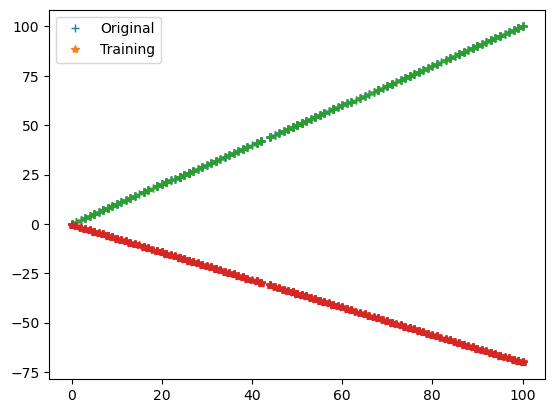

Iteration = 2, Loss = 2149.7108518796927


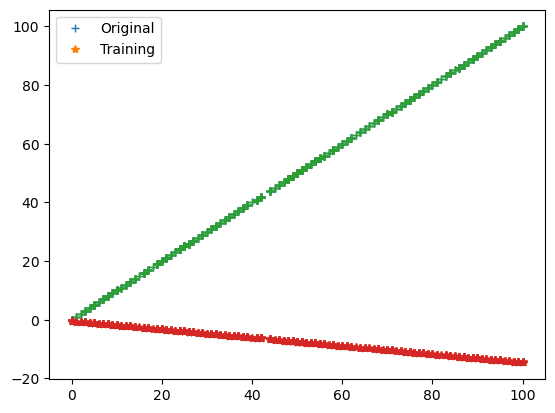

Iteration = 3, Loss = 975.3385329685857


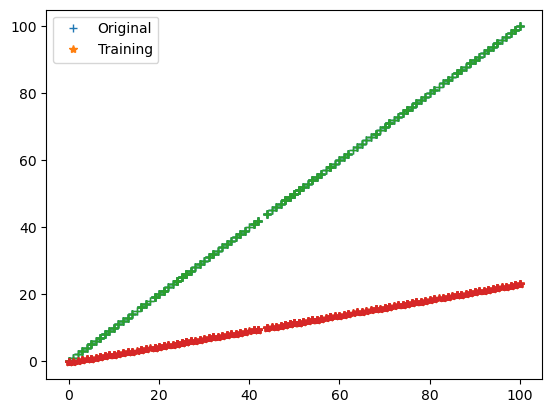

Iteration = 4, Loss = 442.52451047391105


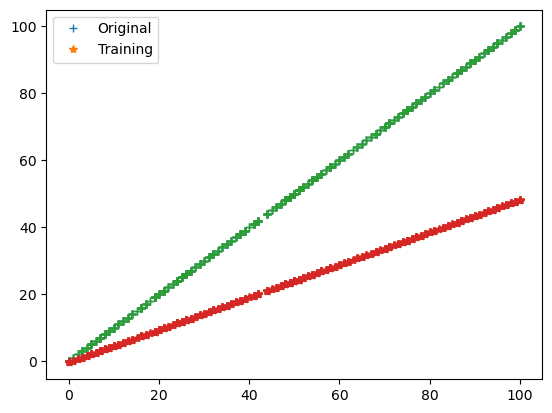

Iteration = 5, Loss = 200.78619767981337


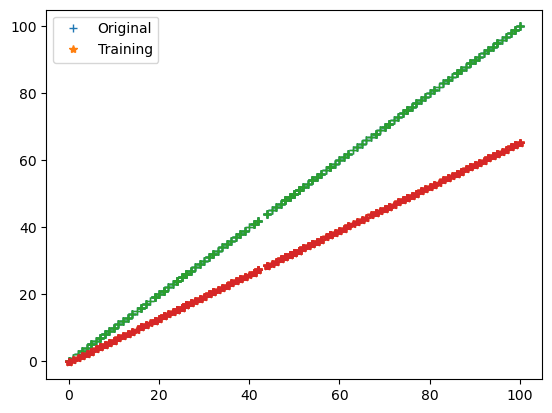

Iteration = 6, Loss = 91.10925678435135


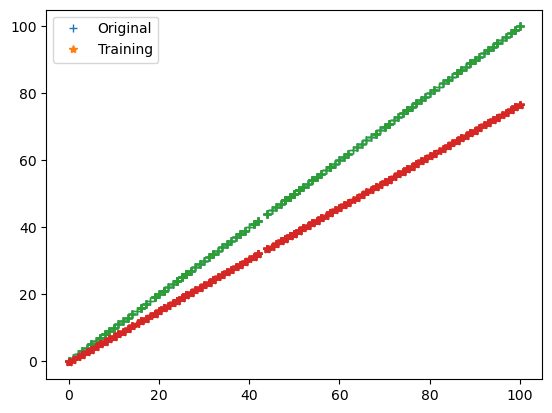

Iteration = 7, Loss = 41.34870659594998


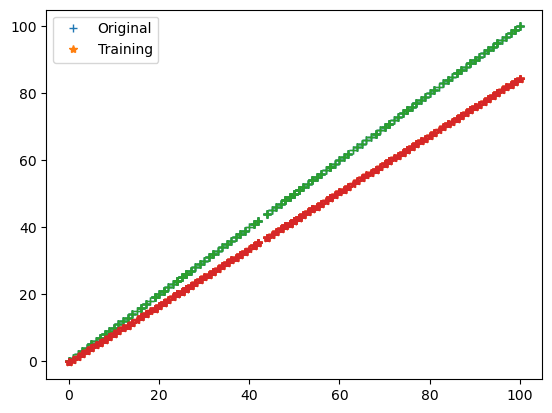

Iteration = 8, Loss = 18.77228923723702


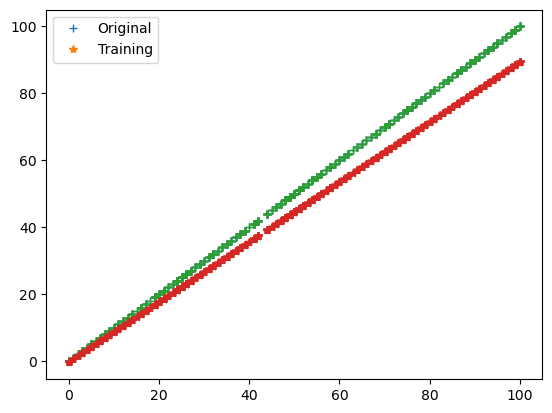

Iteration = 9, Loss = 8.529343053650935


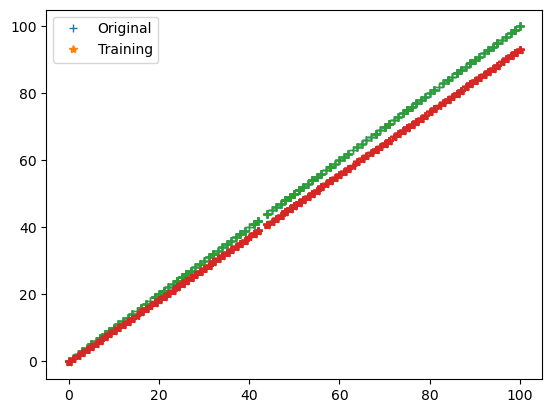

Iteration = 10, Loss = 3.8821064033121484


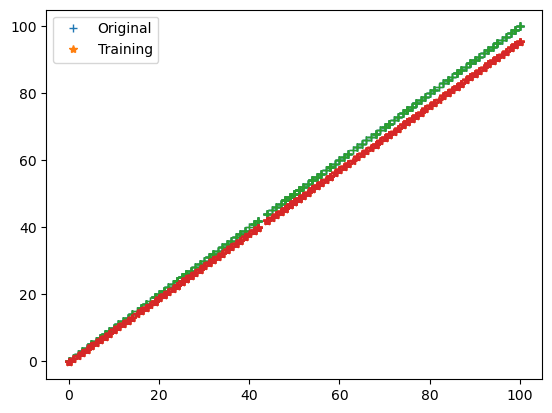

Iteration = 11, Loss = 1.7736493662774953


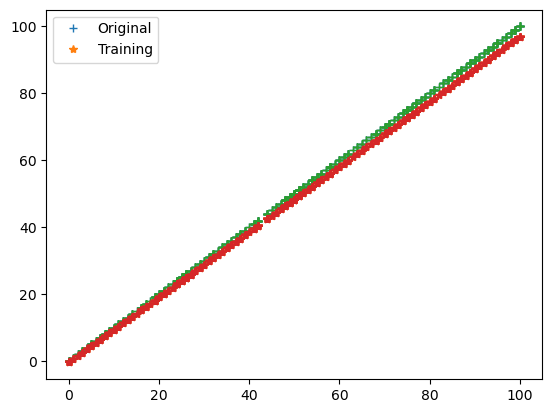

Iteration = 12, Loss = 0.8170394518871493


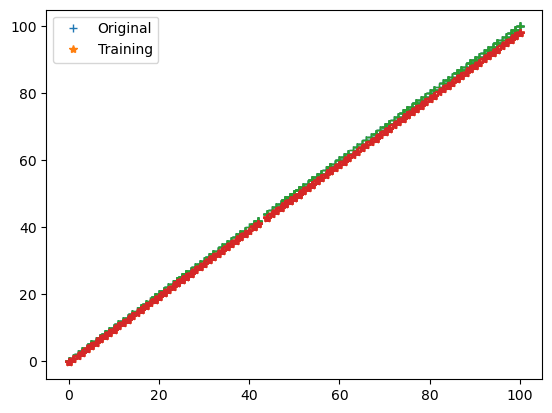

Iteration = 13, Loss = 0.3830238529051765


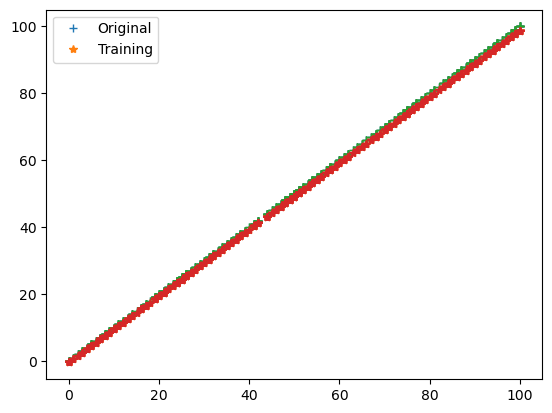

Iteration = 14, Loss = 0.18610987370226795


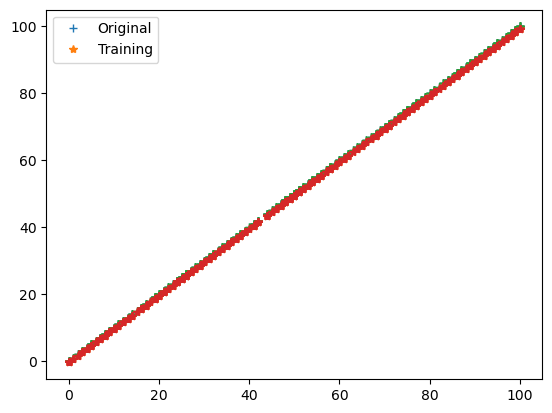

Iteration = 15, Loss = 0.09676916204794488


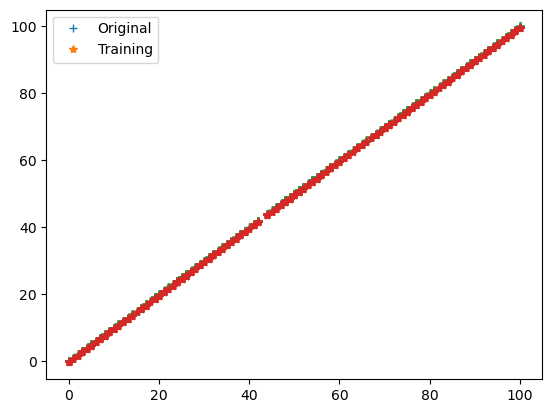

Iteration = 16, Loss = 0.05623456106429151


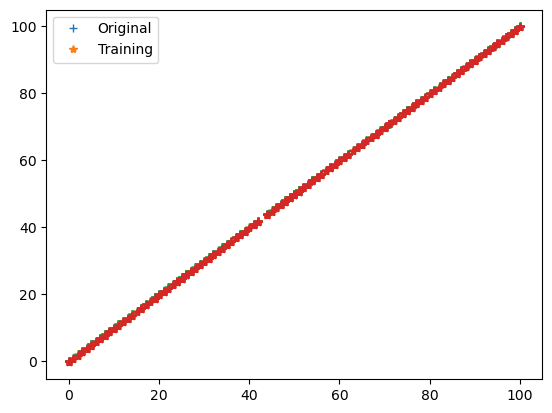

Iteration = 17, Loss = 0.03784334658286797


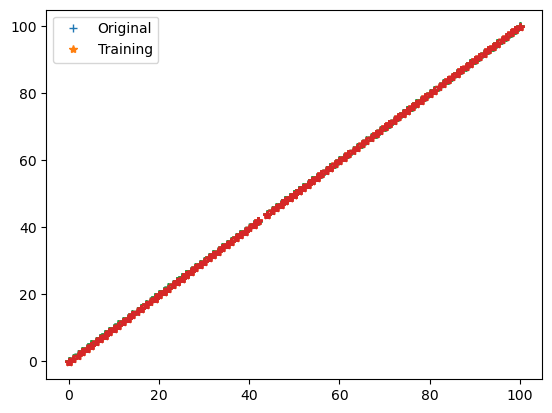

Iteration = 18, Loss = 0.029498611115720972


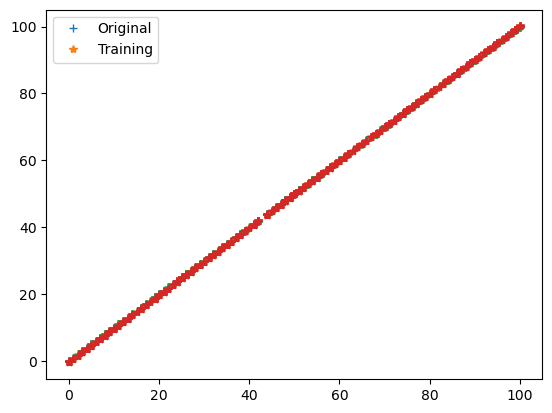

Iteration = 19, Loss = 0.02571197433653176


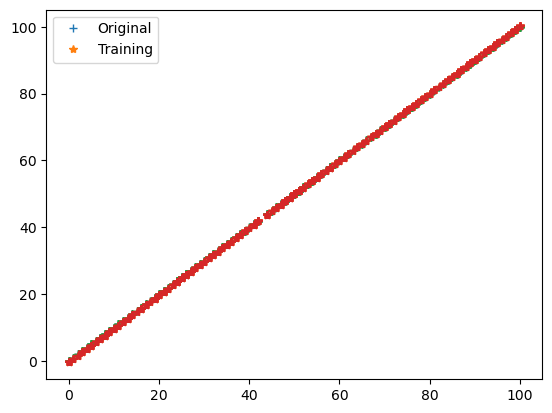

Iteration = 20, Loss = 0.02399335201209159


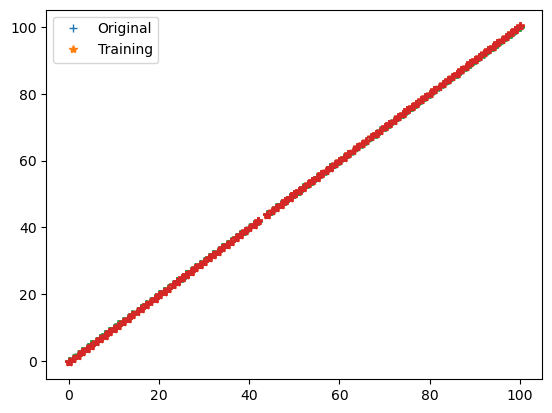

In [86]:
parameters, loss = train(train_input, train_output, 0.0001, 20)

In [88]:
print(parameters)

{'m': 1.0057790194839966, 'c': -0.4232654165433412}


## Let's Predict

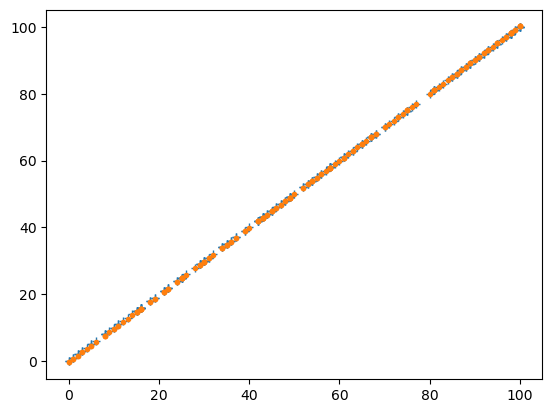

In [90]:
test_predictions = test_input * parameters["m"] + parameters["c"]
plt.figure()
plt.plot(test_input, test_output, '+')
plt.plot(test_input, test_predictions, '.')
plt.show()

## Cost For Test DATA

In [94]:
cost_function(test_predictions, test_output)

0.022424620953693082

Iteration = 1, Loss = 5786.942209892625


<Figure size 640x480 with 0 Axes>

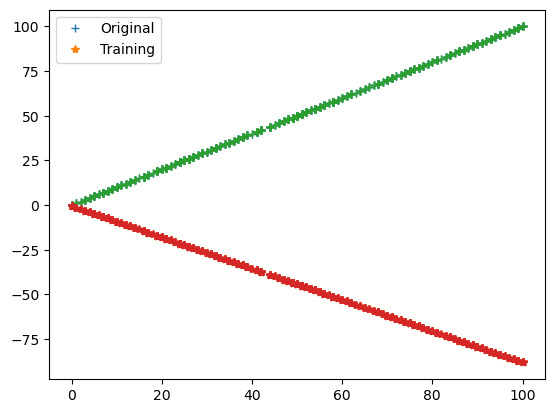

Iteration = 2, Loss = 29668.984701420144


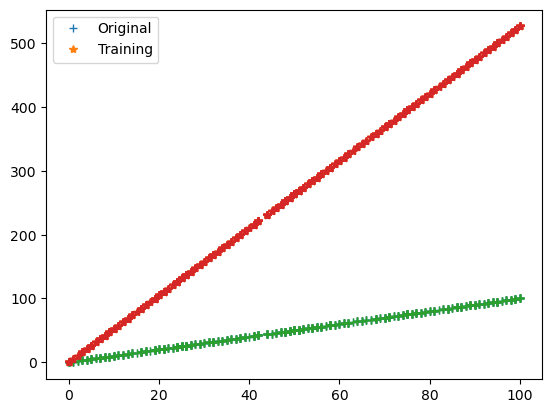

Iteration = 3, Loss = 152109.85487482394


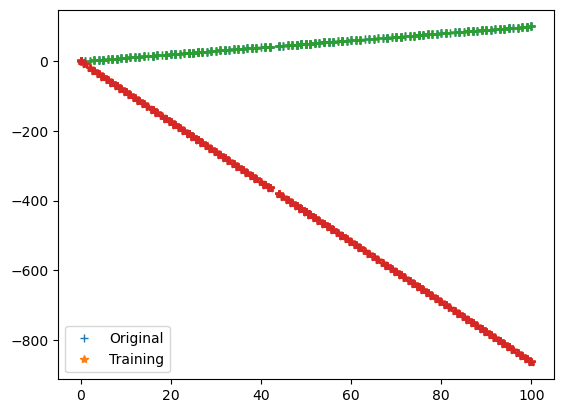

Iteration = 4, Loss = 779852.0879516674


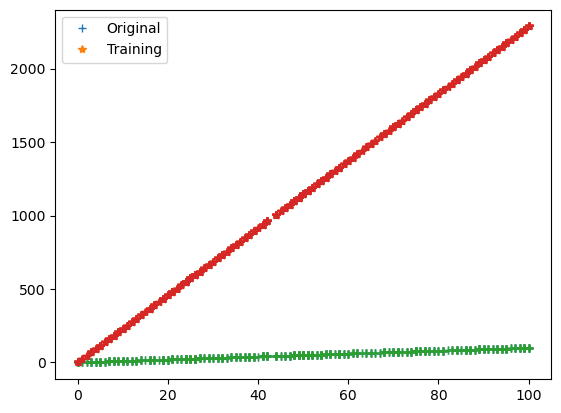

Iteration = 5, Loss = 3998224.4386697677


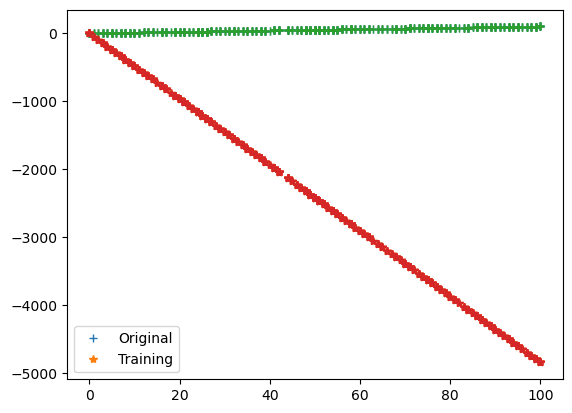

Iteration = 6, Loss = 20498501.21146738


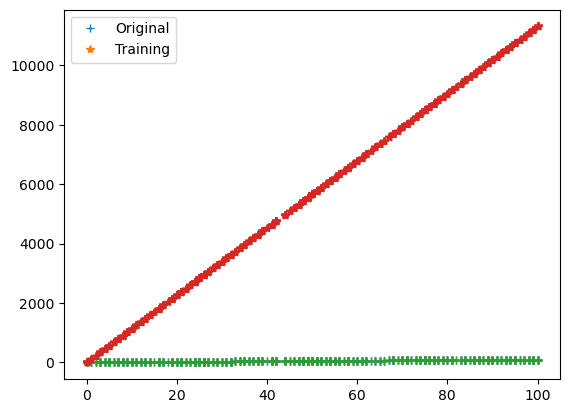

Iteration = 7, Loss = 105093788.49000031


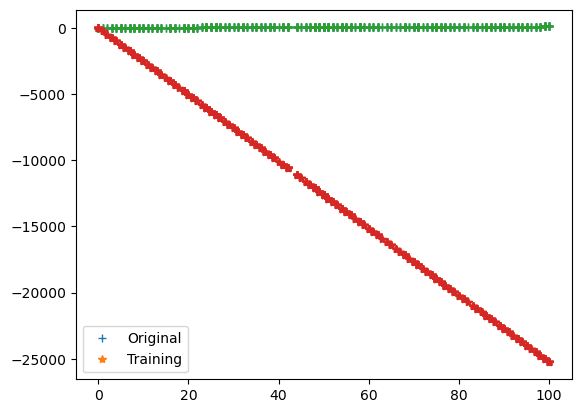

Iteration = 8, Loss = 538805460.6197813


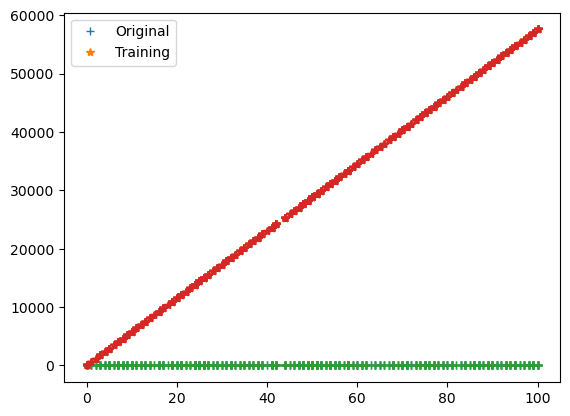

Iteration = 9, Loss = 2762402313.270083


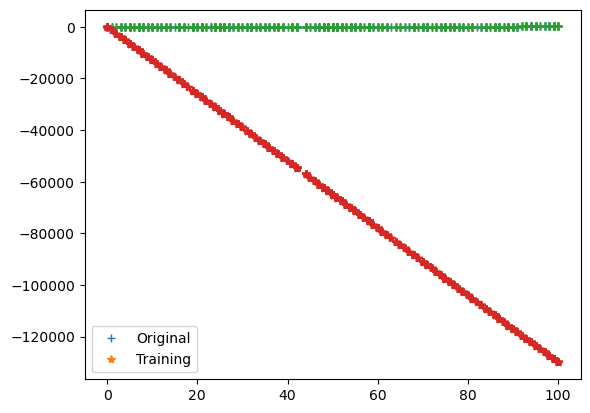

Iteration = 10, Loss = 14162563482.178434


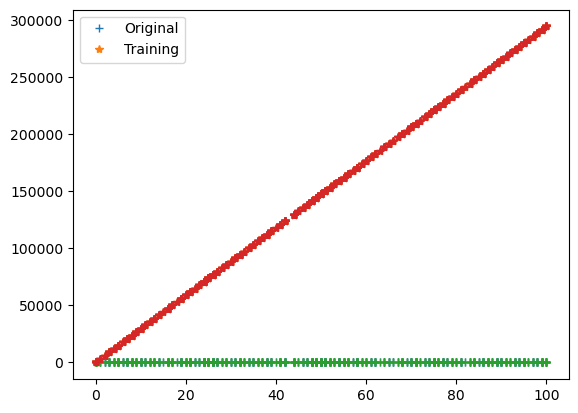

Iteration = 11, Loss = 72610062417.15034


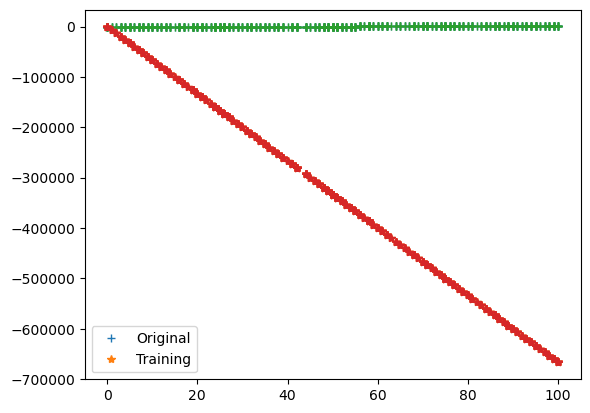

Iteration = 12, Loss = 372264609501.1245


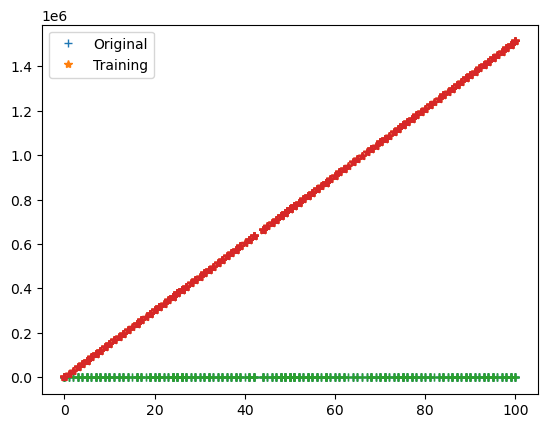

Iteration = 13, Loss = 1908563839139.748


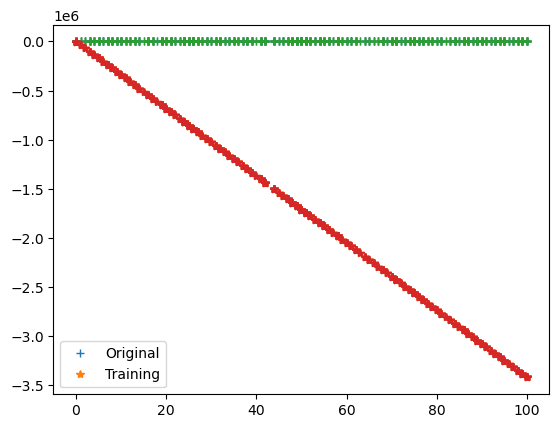

Iteration = 14, Loss = 9785018062698.748


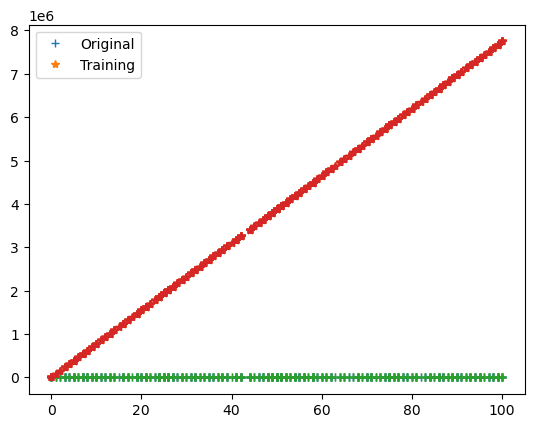

Iteration = 15, Loss = 50166819953215.53


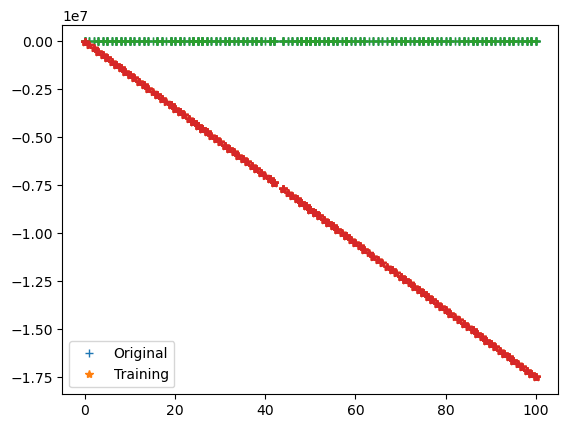

Iteration = 16, Loss = 257200324832535.8


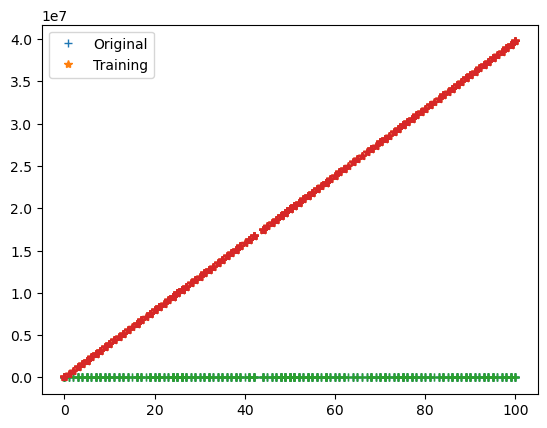

Iteration = 17, Loss = 1318640630513431.5


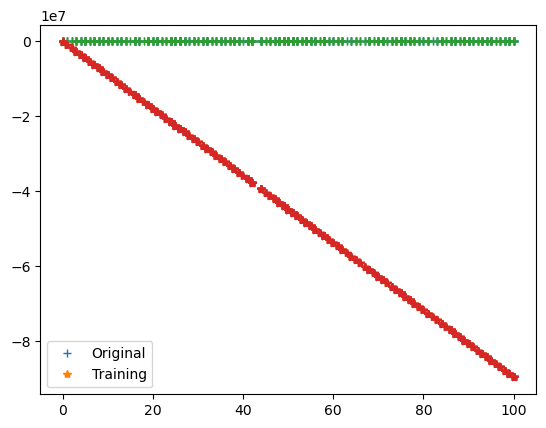

Iteration = 18, Loss = 6760540110410082.0


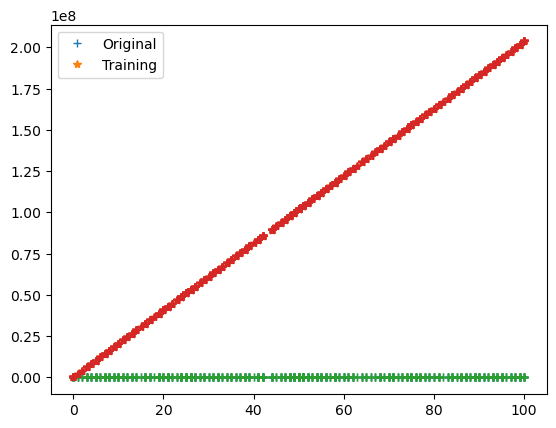

Iteration = 19, Loss = 3.4660620586723252e+16


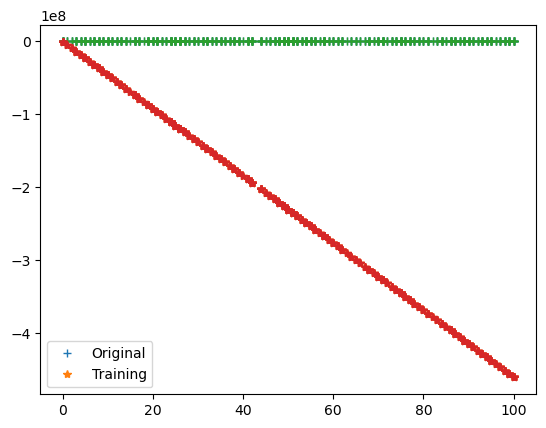

Iteration = 20, Loss = 1.777015741104614e+17


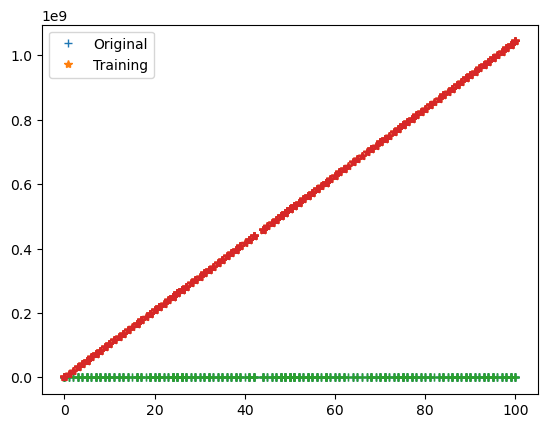

In [75]:
parameters, loss = train(train_input, train_output, 0.001, 20)

Iteration = 1, Loss = 2608.140224925614


<Figure size 640x480 with 0 Axes>

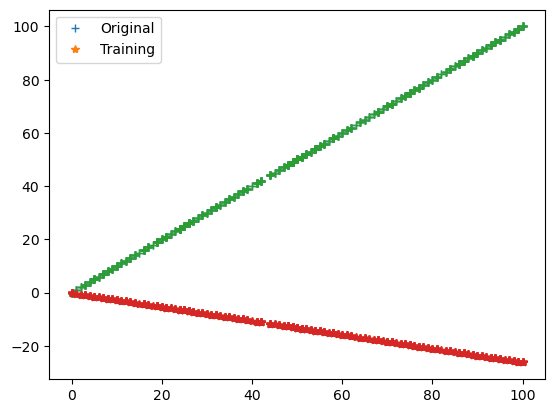

Iteration = 2, Loss = 2611415.2656452893


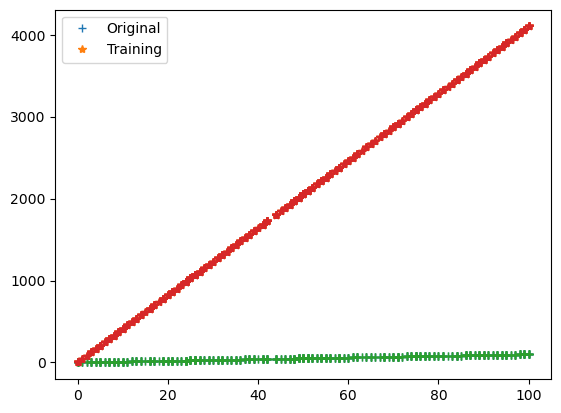

Iteration = 3, Loss = 2614700457.3954906


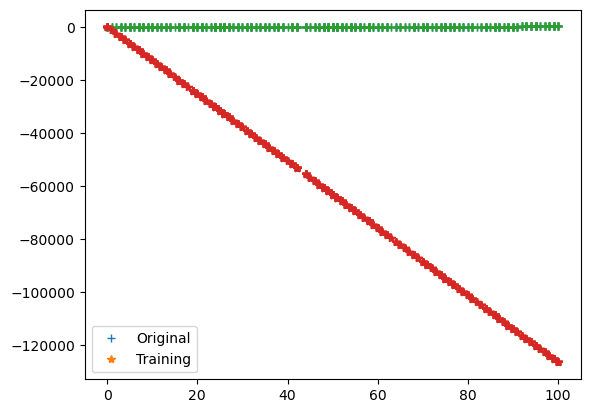

Iteration = 4, Loss = 2617989787964.544


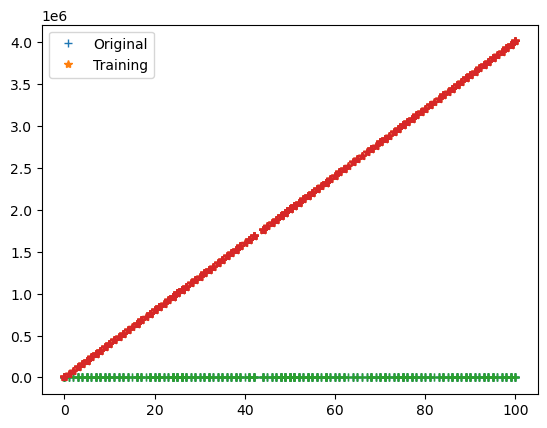

Iteration = 5, Loss = 2621283256564473.0


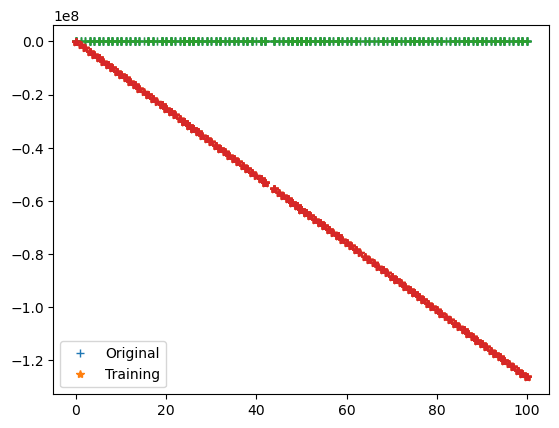

Iteration = 6, Loss = 2.6245808683950147e+18


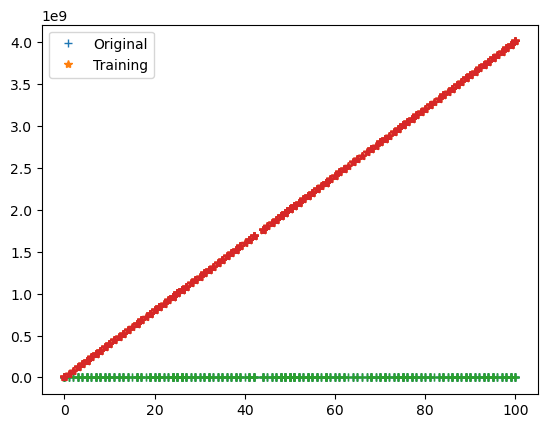

Iteration = 7, Loss = 2.6278826286684066e+21


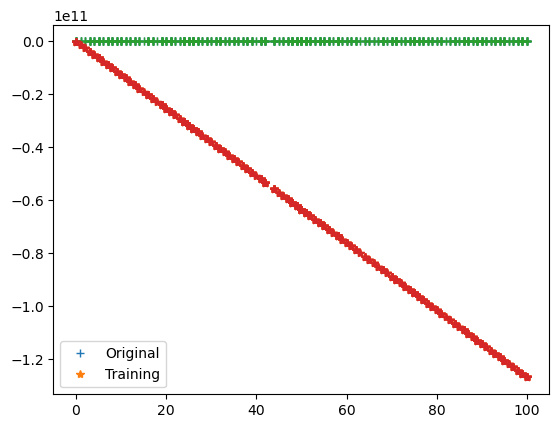

Iteration = 8, Loss = 2.631188542603449e+24


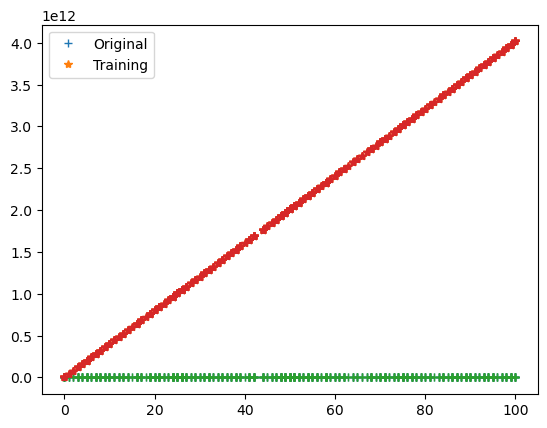

Iteration = 9, Loss = 2.634498615425509e+27


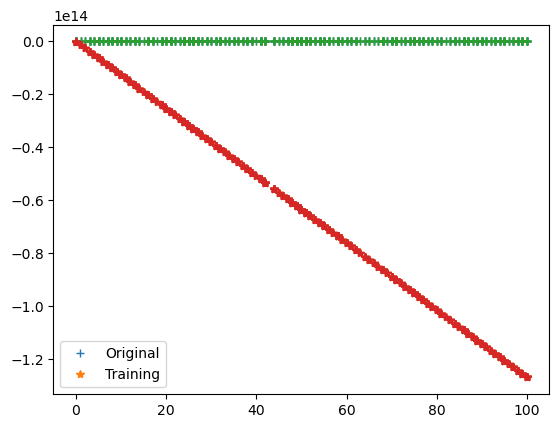

Iteration = 10, Loss = 2.6378128523665234e+30


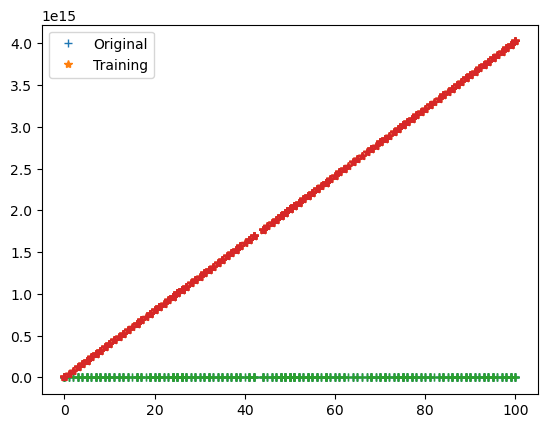

Iteration = 11, Loss = 2.641131258665018e+33


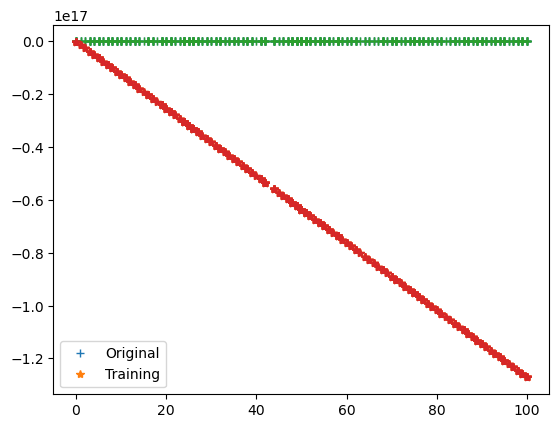

Iteration = 12, Loss = 2.6444538395661e+36


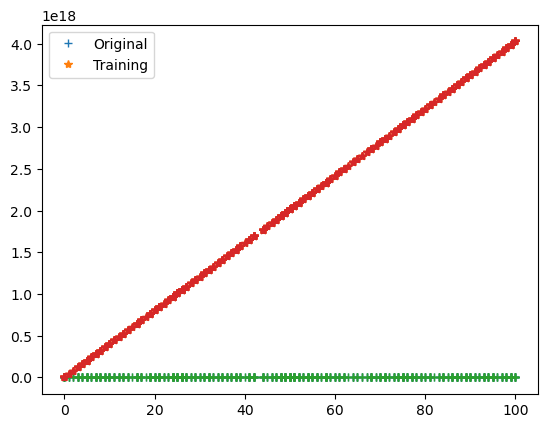

Iteration = 13, Loss = 2.64778060032148e+39


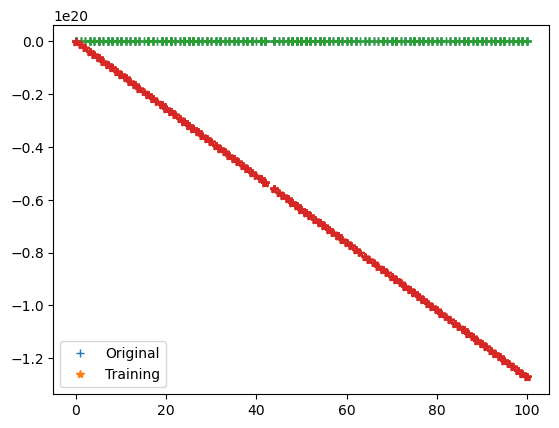

Iteration = 14, Loss = 2.651111546189475e+42


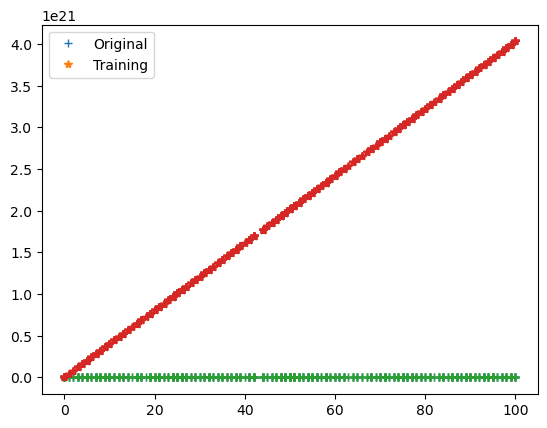

Iteration = 15, Loss = 2.654446682435018e+45


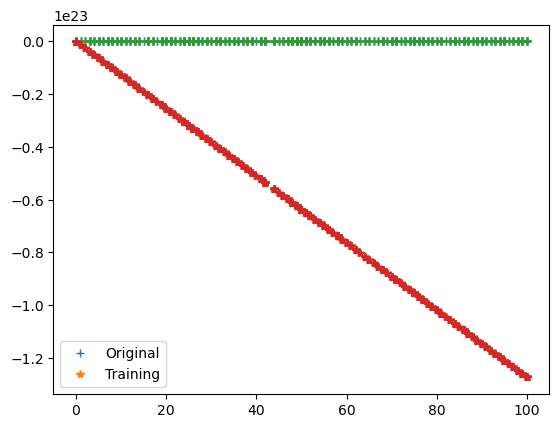

Iteration = 16, Loss = 2.6577860143296605e+48


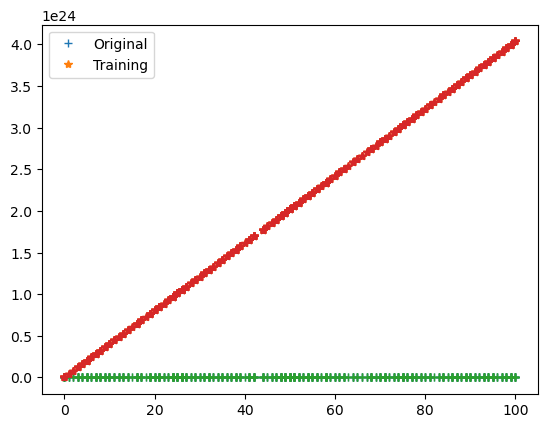

Iteration = 17, Loss = 2.6611295471515908e+51


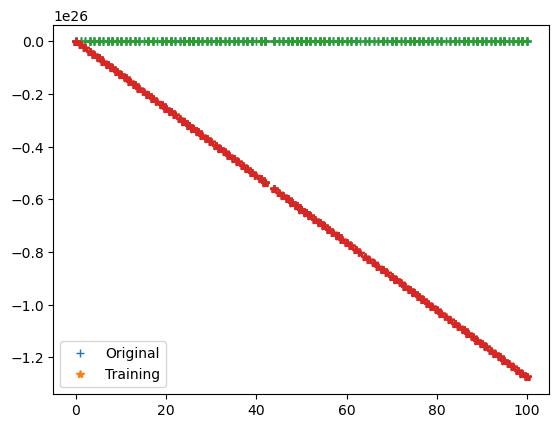

Iteration = 18, Loss = 2.6644772861856365e+54


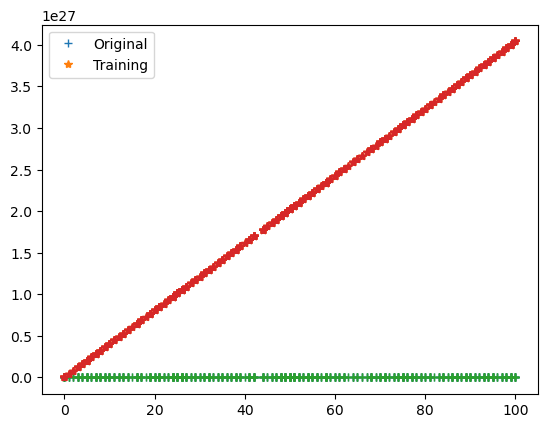

Iteration = 19, Loss = 2.6678292367232713e+57


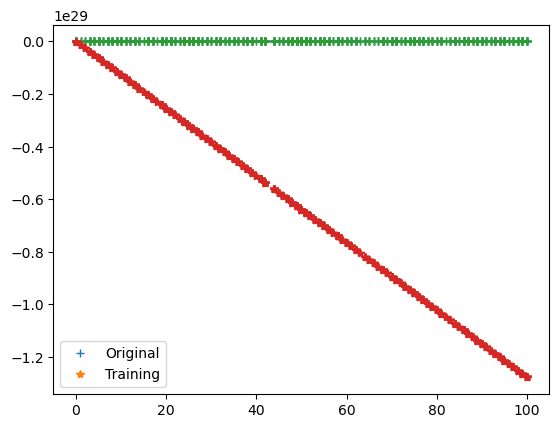

Iteration = 20, Loss = 2.6711854040626272e+60


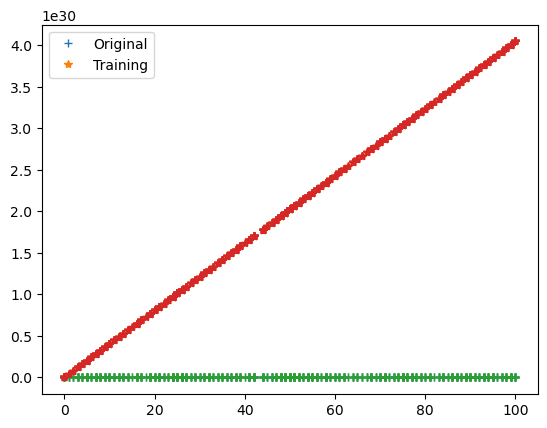

In [76]:
parameters, loss = train(train_input, train_output, 0.01, 20)

In [77]:
print(parameters)

{'m': -1.2799631321703683e+30, 'c': -1.9380269900244855e+28}
